In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.io import ImageCollection

In [2]:
pwd

'/Users/colettace/projects/general/fluoro_gene_expr/analysis'

# Convert videos to image collections

## Grab all the videos

In [3]:
!find . -name "*.avi"

./video_data/20170717 HyperRED 4T1exo H2O2/HyperRED H2O2 500uM Laser11 1042gain -8DigO 5speed 10sInter 10mins.avi
./video_data/20170717 HyperRED 4T1exo H2O2/HyperRED H2O2 500uM Laser11 1042gain -8DigO 5speed 10sInter 10mins_singlechannel.avi
./video_data/20170717 HyperRED 4T1exo H2O2/HyperRED w 4T1EXO H2O2 500uM Laser11 1042gain -8DigO 5speed 10sInter 10mins.avi
./video_data/20170717 HyperRED 4T1exo H2O2/HyperRED w 4T1EXO H2O2 500uM Laser11 1042gain -8DigO 5speed 10sInter 10mins_singlechannel.avi
./video_data/20170816 HyperRED 4T1exo H2O2/HyperRED 4T1exosomes H2O2 500uM plate1.avi
./video_data/20170816 HyperRED 4T1exo H2O2/HyperRED 4T1exosomes H2O2 500uM plate1_singlechannel.avi
./video_data/20170816 HyperRED 4T1exo H2O2/HyperRED 4T1exosomes H2O2 500uM plate2.avi
./video_data/20170816 HyperRED 4T1exo H2O2/HyperRED 4T1exosomes H2O2 500uM plate2_singlechannel.avi
./video_data/20170816 HyperRED 4T1exo H2O2/HyperRED 4T1exosomes H2O2 500uM plate3.avi
./video_data/20170816 HyperRED 4T1exo H2

In [3]:
import os

In [4]:
input_dir = 'video_data'
output_dir = 'image_data'

In [5]:
input_videos = []
output_name_prefixes = []
for tl_root, tl_dirs, tl_files in os.walk( input_dir ):
    for tl_dir in tl_dirs:
        for root, _dir, files in os.walk( os.path.join( input_dir, tl_dir ) ):
            for f in files:
                # skip single channel, since it can't measure confluence
                if 'singlechannel' in f:
                    continue
                if f.endswith( '.avi' ):
                    video_path = os.path.join( input_dir, tl_dir, f )
                    input_videos.append( video_path )
                    # Grab the date from the directory
                    date = tl_dir.split()[0]
                    # remove spaces from filename
                    new_f = f.replace( ' ', '_' )
                    # remove the .avi form the pathname: slice off the last 4 characters
                    new_f = new_f[:-4]
                    new_name_path = os.path.join( output_dir, date + '_' + new_f )
                    output_name_prefixes.append(new_name_path)

In [7]:
from subprocess import run

In [8]:
for i, o in zip( input_videos, output_name_prefixes ):
    command = ['ffmpeg', '-i', i, '-f', 'image2', o + "%05d.png"]
    print( " ".join( command ), '\n' )
    run( command, check=True )

ffmpeg -i video_data/20170717 HyperRED 4T1exo H2O2/HyperRED H2O2 500uM Laser11 1042gain -8DigO 5speed 10sInter 10mins.avi -f image2 image_data/20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins%05d.png 

ffmpeg -i video_data/20170717 HyperRED 4T1exo H2O2/HyperRED w 4T1EXO H2O2 500uM Laser11 1042gain -8DigO 5speed 10sInter 10mins.avi -f image2 image_data/20170717_HyperRED_w_4T1EXO_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins%05d.png 

ffmpeg -i video_data/20170816 HyperRED 4T1exo H2O2/HyperRED 4T1exosomes H2O2 500uM plate1.avi -f image2 image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate1%05d.png 

ffmpeg -i video_data/20170816 HyperRED 4T1exo H2O2/HyperRED 4T1exosomes H2O2 500uM plate2.avi -f image2 image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate2%05d.png 

ffmpeg -i video_data/20170816 HyperRED 4T1exo H2O2/HyperRED 4T1exosomes H2O2 500uM plate3.avi -f image2 image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate3%05d.png 

ffmpe

In [7]:
single_channels = [ _ for _ in output_name_prefixes if 'singlechannel' in _ ]
three_channels = [ _ for _ in output_name_prefixes if 'singlechannel' not in _ ]

In [8]:
three_channels

['image_data/20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins',
 'image_data/20170717_HyperRED_w_4T1EXO_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins',
 'image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate1',
 'image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate2',
 'image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate3',
 'image_data/20170816_HyperRED_H2O2_500uM_plate1',
 'image_data/20170816_HyperRED_H2O2_500uM_plate2',
 'image_data/20170816_HyperRED_H2O2_500uM_plate3',
 'image_data/20170816_WT_RAW_H2O2_500uM']

# Load videos and get summary stats

Remove the 7-pixel border on the left side of all videos

In [9]:
rgb_videos = {}
for frame_prefix in three_channels:
    frames = ImageCollection( frame_prefix + '*.png' )
    rgb_videos[ frame_prefix ] = [ f[:,7:,:] for f in frames ]
    print( frame_prefix, len(frames) )

image_data/20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins 60
image_data/20170717_HyperRED_w_4T1EXO_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins 60
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate1 60
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate2 60
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate3 60
image_data/20170816_HyperRED_H2O2_500uM_plate1 60
image_data/20170816_HyperRED_H2O2_500uM_plate2 60
image_data/20170816_HyperRED_H2O2_500uM_plate3 60
image_data/20170816_WT_RAW_H2O2_500uM 60


# Red channel average pixel intensity across videos

image_data/20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins
image_data/20170717_HyperRED_w_4T1EXO_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate1
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate2
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate3
image_data/20170816_HyperRED_H2O2_500uM_plate1
image_data/20170816_HyperRED_H2O2_500uM_plate2
image_data/20170816_HyperRED_H2O2_500uM_plate3
image_data/20170816_WT_RAW_H2O2_500uM


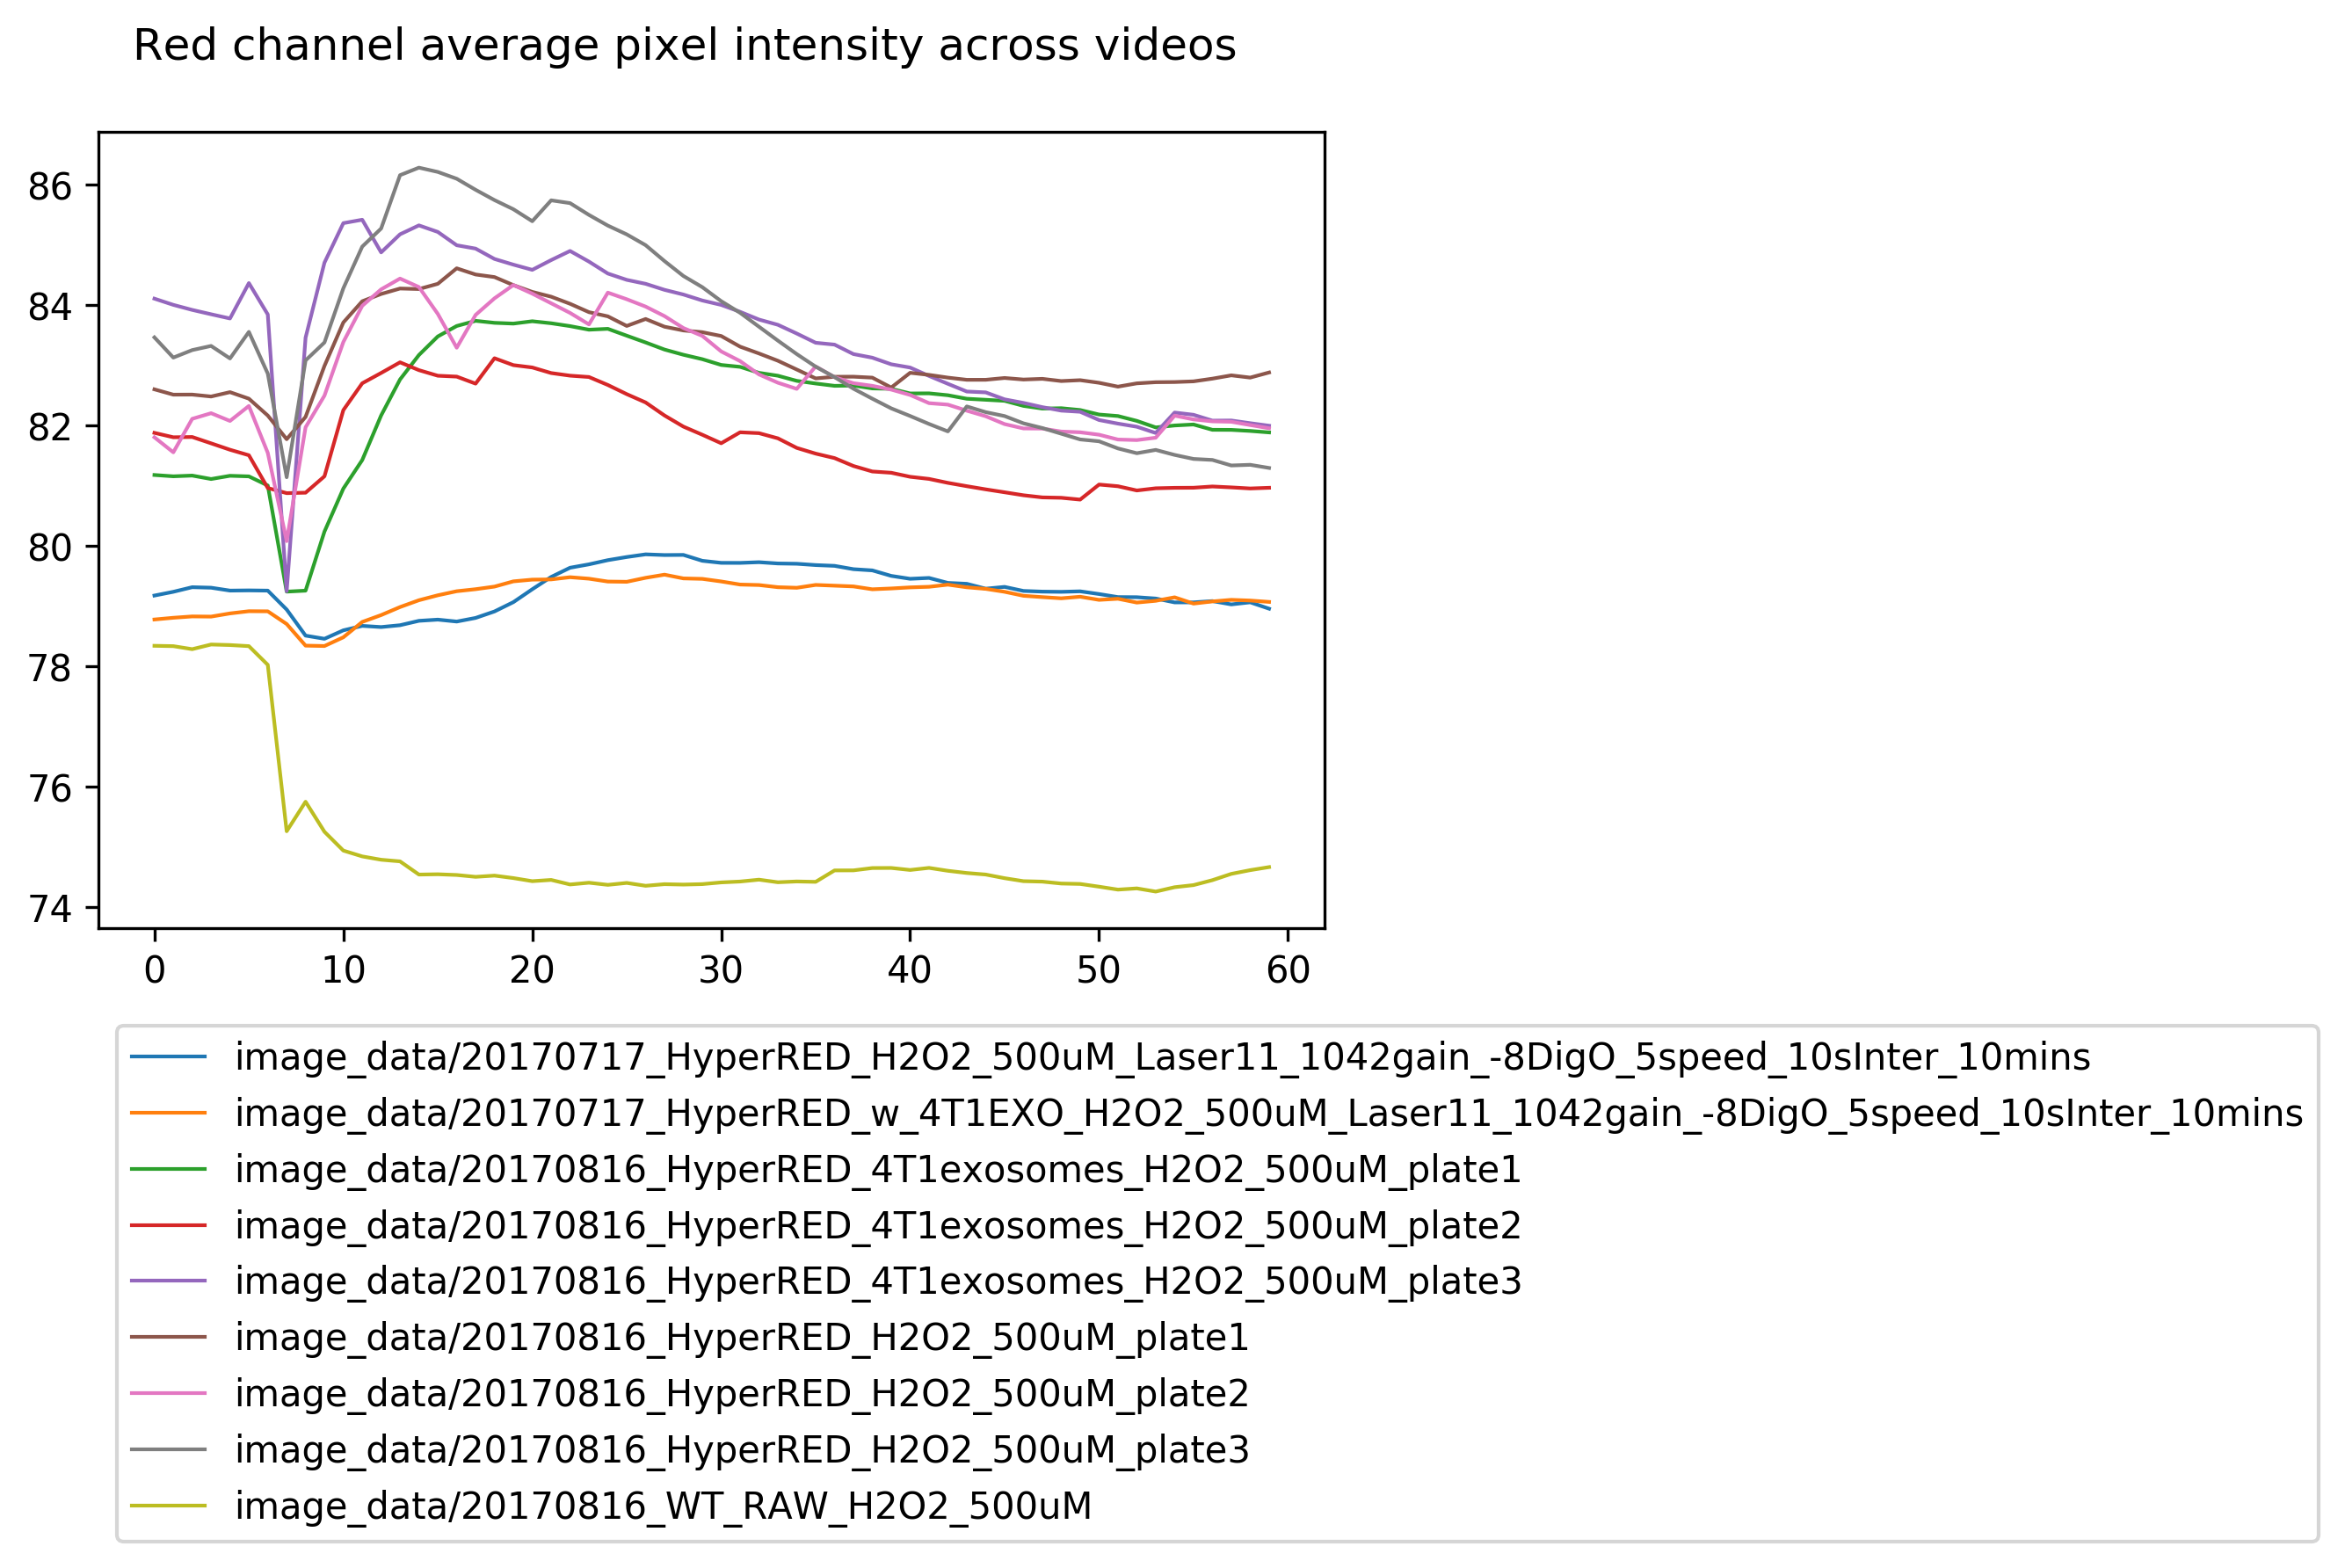

In [10]:
fig, ax = plt.subplots( figsize=(6,4), dpi=(300))
for frame_prefix, frames in rgb_videos.items():
    print( frame_prefix )
    ax.plot( [ f[:,:,0].mean() for f in frames ], label=frame_prefix, linewidth=1 )
ax.legend( loc='upper left', bbox_to_anchor=(0, -0.1) )
fig.suptitle( 'Red channel average pixel intensity across videos ')
fig.savefig( '20170911_RedChannelMeanPixelIntensity.pdf')

# Green Channel Average Pixel Intensity

image_data/20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins
image_data/20170717_HyperRED_w_4T1EXO_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate1
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate2
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate3
image_data/20170816_HyperRED_H2O2_500uM_plate1
image_data/20170816_HyperRED_H2O2_500uM_plate2
image_data/20170816_HyperRED_H2O2_500uM_plate3
image_data/20170816_WT_RAW_H2O2_500uM


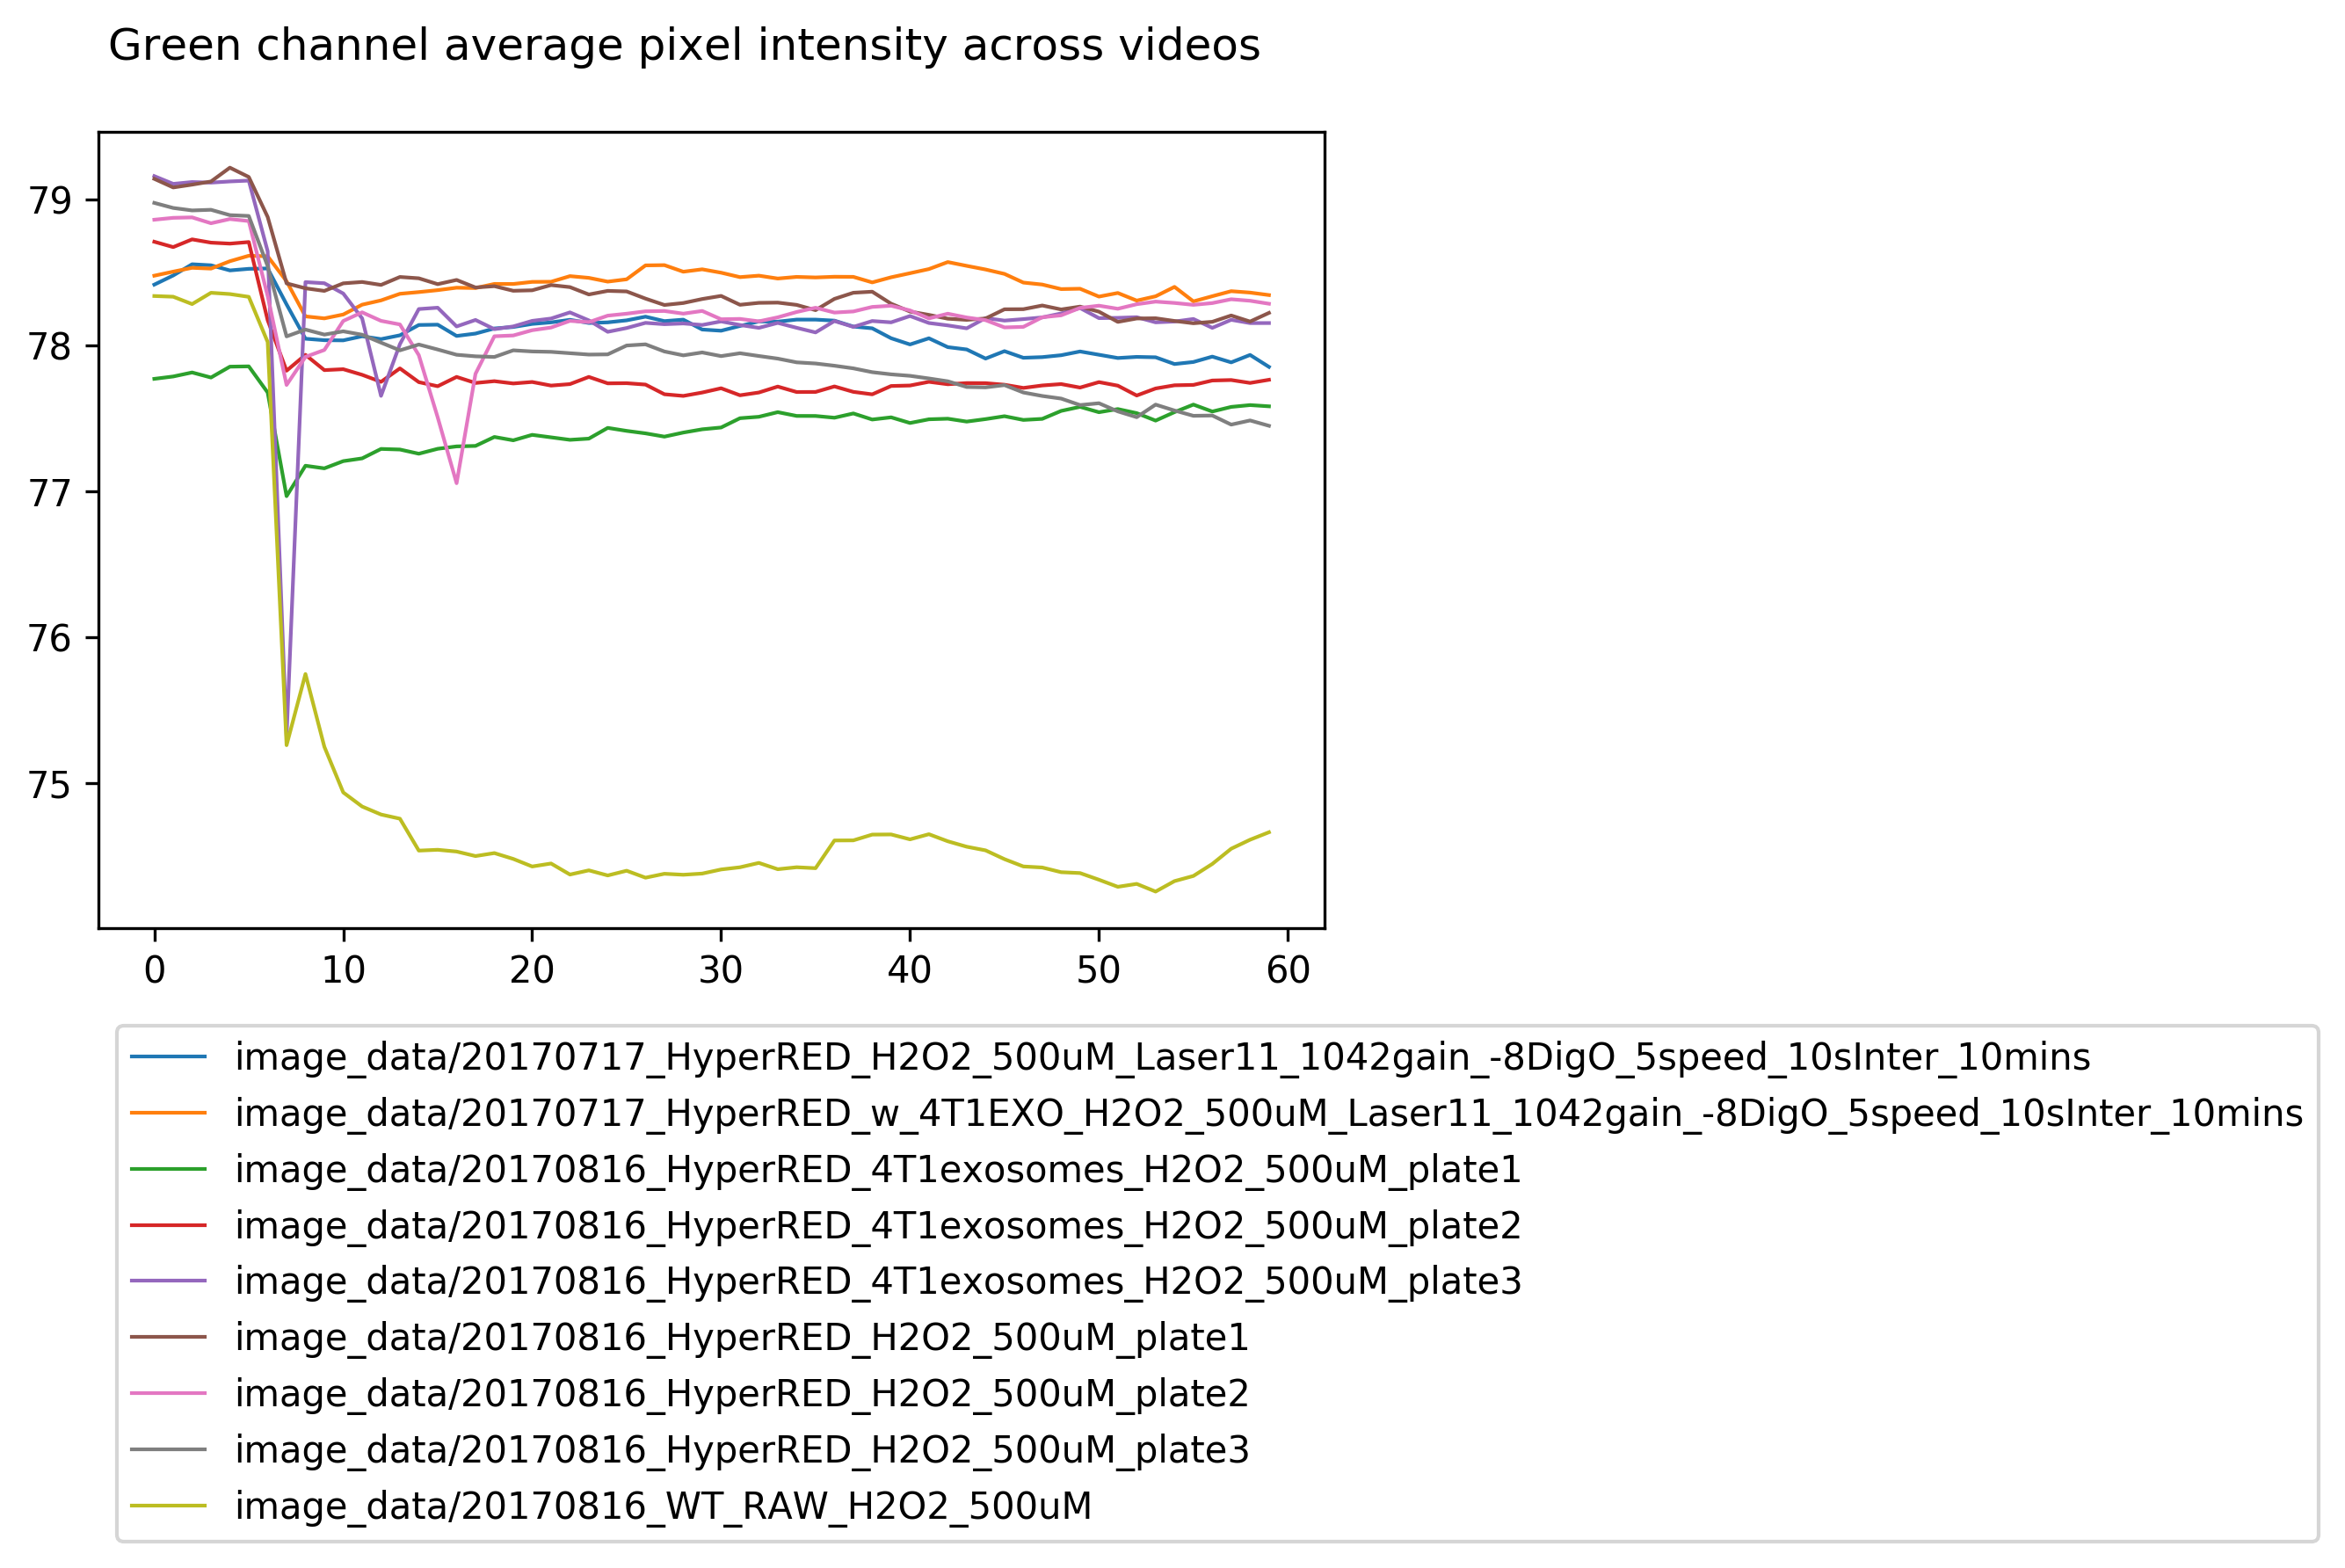

In [11]:
fig, ax = plt.subplots( figsize=(6,4), dpi=(300))
for frame_prefix, frames in rgb_videos.items():
    print( frame_prefix )
    ax.plot( [ f[:,:,1].mean() for f in frames ], label=frame_prefix, linewidth=1 )
ax.legend( loc='upper left', bbox_to_anchor=(0, -0.1) )
fig.suptitle( 'Green channel average pixel intensity across videos ')
fig.savefig( '20170911_GreenChannelMeanPixelIntensity.pdf')

# Blue Channel Average Pixel intensity

In [12]:
fig, ax = plt.subplots( figsize=(6,4), dpi=(300))
for frame_prefix, frames in rgb_videos.items():
    print( frame_prefix )
    ax.plot( [ f[:,:,2].mean() for f in frames ], label=frame_prefix, linewidth=1 )
ax.legend( loc='upper left', bbox_to_anchor=(0, -0.1) )
fig.suptitle( 'Blue channel average pixel intensity across videos ')
fig.savefig( '20170911_BlueChannelMeanPixelIntensity.pdf')

image_data/20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins
image_data/20170717_HyperRED_w_4T1EXO_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate1
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate2
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate3
image_data/20170816_HyperRED_H2O2_500uM_plate1
image_data/20170816_HyperRED_H2O2_500uM_plate2
image_data/20170816_HyperRED_H2O2_500uM_plate3
image_data/20170816_WT_RAW_H2O2_500uM


# What pixel intensities are most common?

### 20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins

In [10]:
vid_iterator = iter(rgb_videos.items())

In [11]:
name, vid = next(vid_iterator)

In [12]:
print(name)

image_data/20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins


In [13]:
vid[0].shape

(512, 512, 3)

In [14]:
from collections import Counter

In [15]:
frame0_R = vid[0][:,:,0].copy()

In [16]:
Counter(frame0_R.flatten()).most_common(10)

[(80, 23218),
 (79, 22403),
 (81, 21916),
 (78, 21631),
 (77, 20161),
 (83, 20064),
 (82, 19991),
 (76, 19263),
 (75, 16476),
 (84, 14224)]

In [17]:
X, Y = zip(*[ (x,y) for x,y in sorted(list( Counter(frame0_R.flatten()).items())) if x >=65 and x < 90] )

In [18]:
plt.plot( X, Y)
plt.title( name )

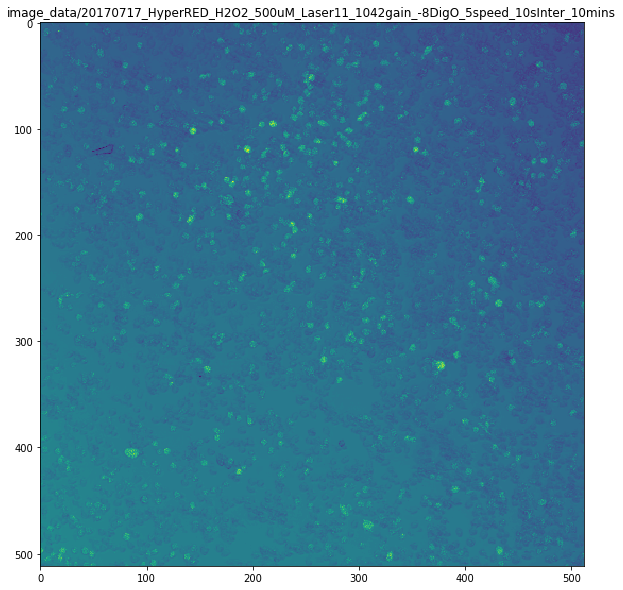

In [19]:
fig,ax = plt.subplots( figsize=(10,10))
ax.imshow( frame0_R )
ax.set_title( name )

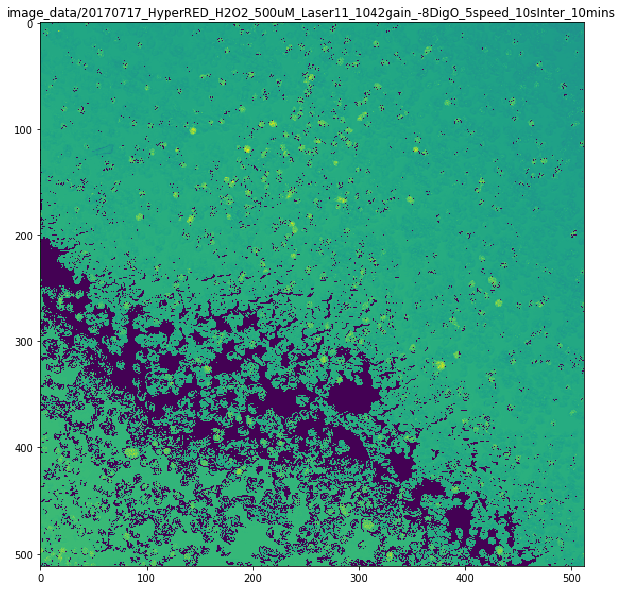

In [20]:
masked = frame0_R.copy()
masked[ (masked >= 82) & (masked <= 83) ] = 0
fig,ax = plt.subplots( figsize=(10,10))
ax.imshow( masked )
ax.set_title( name )

# Try CLAHE

In [21]:
from skimage.color import gray2rgb, rgb2hsv, hsv2rgb
from skimage.exposure import equalize_adapthist

In [119]:
frame0_R = equalize_adapthist( vid[0] )[:,:,0]

/usr/local/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [120]:
Counter(frame0_R.flatten()).most_common(800)

[(0.3349586470806073, 359),
 (0.4546969509937045, 351),
 (0.26830020985063574, 315),
 (0.30113566226391802, 291),
 (0.37717565732625602, 284),
 (0.31792371312183682, 273),
 (0.24978397728675472, 271),
 (0.39742007159609921, 245),
 (0.32267621281323294, 237),
 (0.36014072336748548, 233),
 (0.34335267250956675, 232),
 (0.27002839155659791, 220),
 (0.32286137513887175, 220),
 (0.38674237748426121, 201),
 (0.28089124799407483, 200),
 (0.38668065670904828, 198),
 (0.41766448586594251, 197),
 (0.38637205283298359, 195),
 (0.43445253672386125, 188),
 (0.30187631156647327, 186),
 (0.3865572151586224, 186),
 (0.40396247376867056, 186),
 (0.38729786446117764, 185),
 (0.38643377360819653, 178),
 (0.40346870756696707, 177),
 (0.38698926058511296, 173),
 (0.38661893593383534, 172),
 (0.38692753980990002, 171),
 (0.35927663251450437, 170),
 (0.36618935933835328, 169),
 (0.3552030613504506, 167),
 (0.38723614368596471, 167),
 (0.38711270213553883, 166),
 (0.36631280088877916, 166),
 (0.30193803234168

In [121]:
most_common_px_intensities = [ intens[0] for i, intens in enumerate( Counter(frame0_R.flatten()).most_common() ) if i < 800 ]

In [122]:
most_common_px_intensities

[0.3349586470806073,
 0.4546969509937045,
 0.26830020985063574,
 0.30113566226391802,
 0.37717565732625602,
 0.31792371312183682,
 0.24978397728675472,
 0.39742007159609921,
 0.32267621281323294,
 0.36014072336748548,
 0.34335267250956675,
 0.27002839155659791,
 0.32286137513887175,
 0.38674237748426121,
 0.28089124799407483,
 0.38668065670904828,
 0.41766448586594251,
 0.38637205283298359,
 0.43445253672386125,
 0.30187631156647327,
 0.3865572151586224,
 0.40396247376867056,
 0.38729786446117764,
 0.38643377360819653,
 0.40346870756696707,
 0.38698926058511296,
 0.38661893593383534,
 0.38692753980990002,
 0.35927663251450437,
 0.36618935933835328,
 0.3552030613504506,
 0.38723614368596471,
 0.38711270213553883,
 0.36631280088877916,
 0.3019380323416862,
 0.3858782866312801,
 0.38816195531415876,
 0.40390075299345762,
 0.38735958523639058,
 0.36600419701271447,
 0.3870509813603259,
 0.38686581903468709,
 0.28514998148376741,
 0.36625108011356622,
 0.38649549438340947,
 0.36588075546228

In [123]:
X, Y = zip(* sorted( list( Counter(frame0_R.flatten()).items() )) )

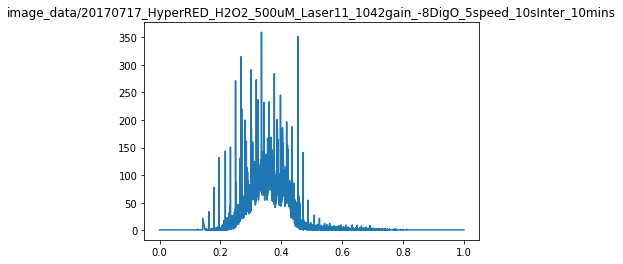

In [124]:
plt.plot( X, Y)
plt.title( name )

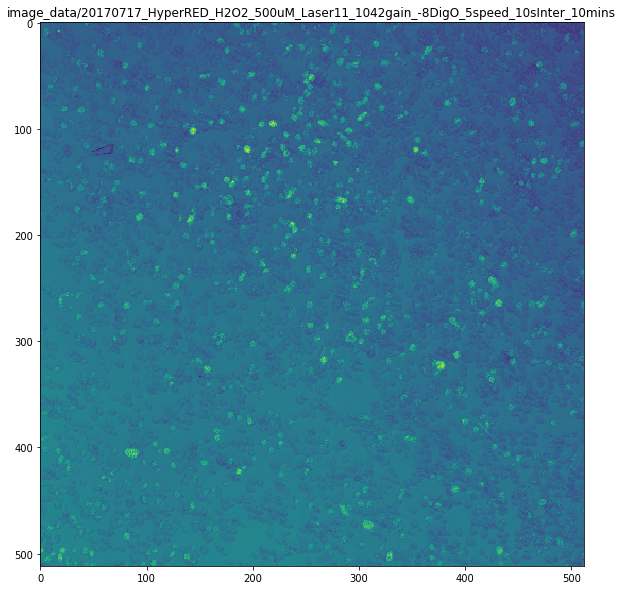

In [125]:
fig,ax = plt.subplots( figsize=(10,10))
ax.imshow( frame0_R )
ax.set_title( name )

In [126]:
for val in most_common_px_intensities:
    frame0_R[ frame0_R == val ] = 1.0

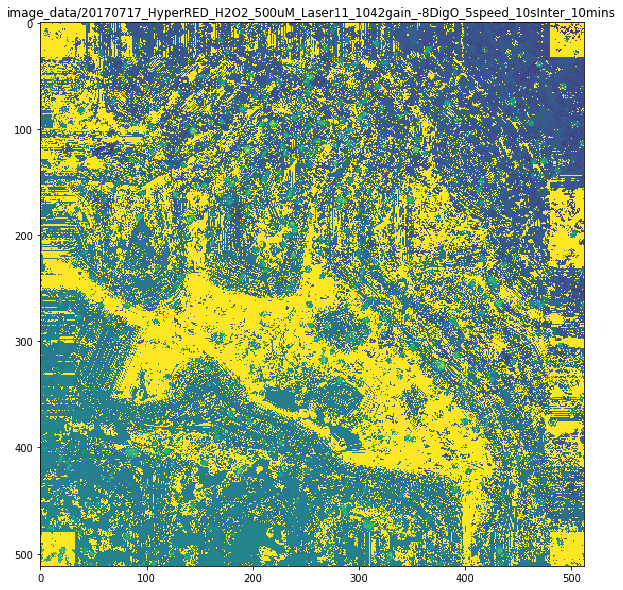

In [127]:
fig,ax = plt.subplots( figsize=(10,10))
ax.imshow( frame0_R )
ax.set_title( name )

# next

## 20170816_HyperRED_4T1exosomes_H2O2_500uM_plate1

### REd channel

In [22]:
name, vid = next( vid_iterator )
name, vid = next( vid_iterator )

In [23]:
print(name)

image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate1


In [24]:
frame0_R = vid[0][:,:,0].copy()

In [25]:
Counter(frame0_R.flatten()).most_common(10)

[(80, 21575),
 (81, 20368),
 (79, 20077),
 (78, 19584),
 (77, 17231),
 (82, 16892),
 (76, 14835),
 (83, 14774),
 (75, 13276),
 (84, 11487)]

In [26]:
X, Y = zip(*[ (x,y) for x,y in sorted(list( Counter(frame0_R.flatten()).items())) if x >=65 and x < 90] )

In [27]:
plt.plot( X, Y)
plt.title( name )

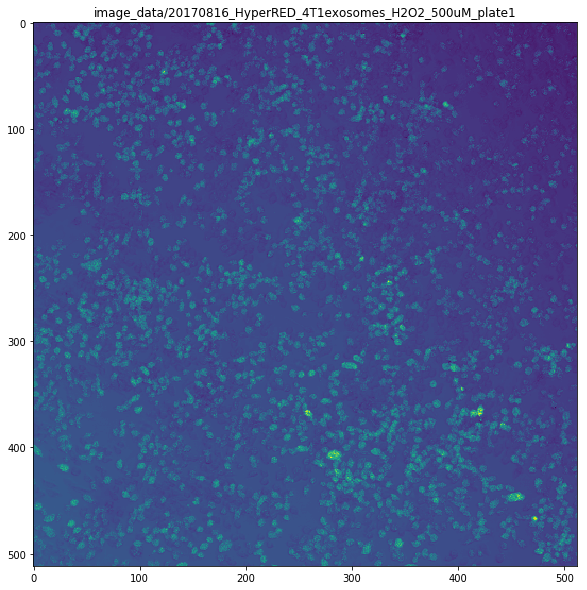

In [28]:
fig,ax = plt.subplots( figsize=(10,10))
ax.imshow( frame0_R )
ax.set_title( name )

In [29]:
masked = frame0_R.copy()
masked[ (masked >= 68) & (masked <= 86) ] = 0
fig,ax = plt.subplots( figsize=(10,10))
ax.imshow( masked )
ax.set_title( name )

### Blue Channel

In [167]:
frame0_R = vid[0][:,:,2].copy()

In [168]:
Counter(frame0_R.flatten()).most_common(10)

[(80, 27650),
 (81, 26451),
 (79, 25668),
 (82, 24511),
 (83, 22273),
 (78, 20599),
 (77, 16384),
 (76, 16256),
 (84, 15746),
 (75, 13069)]

In [169]:
X, Y = zip(*sorted(list( Counter(frame0_R.flatten()).items()) ))

plt.plot( X, Y)
plt.title( name )

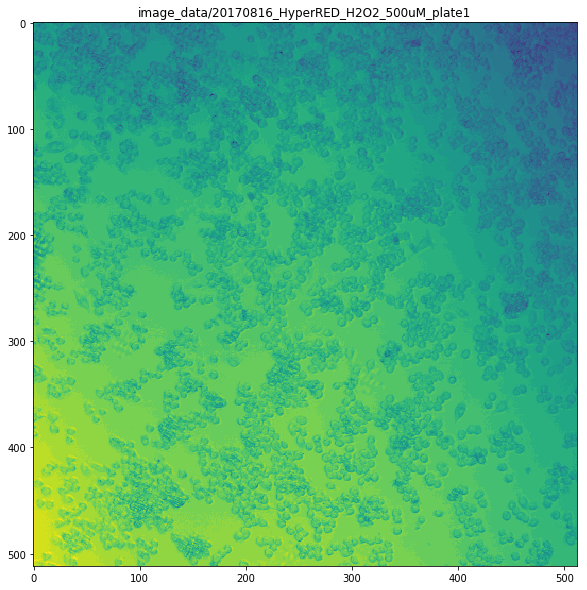

In [171]:
fig,ax = plt.subplots( figsize=(10,10))
ax.imshow( frame0_R )
ax.set_title( name )

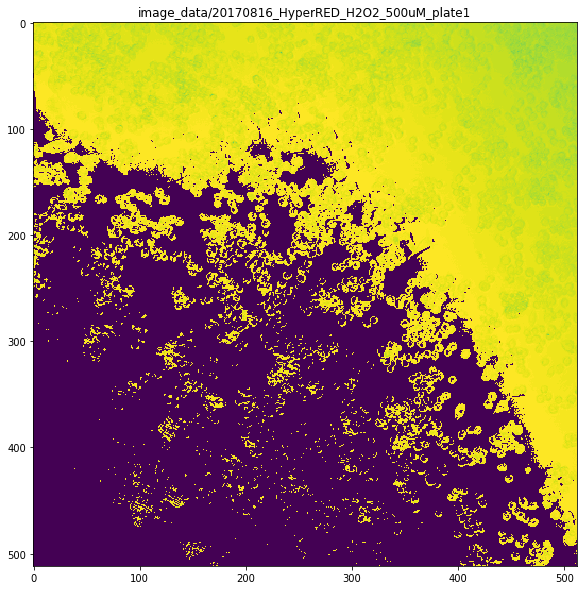

In [193]:
masked = frame0_R.copy()
masked[ (masked >= 80)] = 0
fig,ax = plt.subplots( figsize=(10,10))
ax.imshow( masked )
ax.set_title( name )

## Normalize illumination in red channel

In [30]:
frame0_R = vid[0][:,:,0].copy()

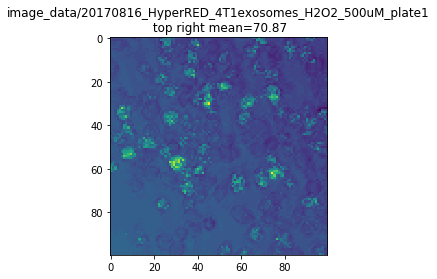

In [31]:
#top right 
top_right = frame0_R[:100,-100:]
plt.imshow( top_right )
plt.title( name + "\n top right mean={:0.2f}".format( top_right.mean() ) )

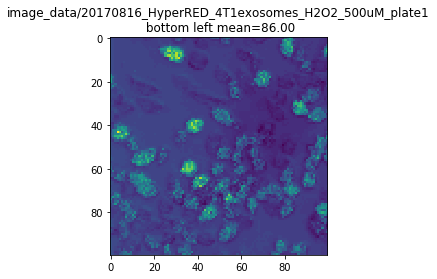

In [32]:
# bottom left
bot_left = frame0_R[-100:,:100]
plt.imshow( bot_left )
plt.title( name + "\n bottom left mean={:0.2f}".format( bot_left.mean() ) )

In [33]:
mid = (bot_left.mean() - top_right.mean())/2

In [34]:
mid

7.5648000000000053

In [35]:
(bot_left.mean() + mid) / bot_left.mean()

1.0879669844725155

In [36]:
frame0_R.shape

(512, 512)

In [37]:
import numpy as np

In [42]:
def GenerateCorrection( C=0.1 ):
    correction = np.empty( frame0_R.shape )
    for y in range( 512 ):
        for x in range( 512 ):
            correction[x,y] = ( (x-y)/512 ) * C

    correction += np.ones( frame0_R.shape )
    plt.imshow( correction )
    plt.colorbar()
    return correction


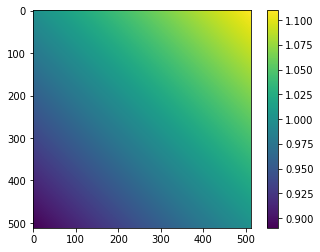

In [82]:
correction_matr = GenerateCorrection( C=-0.11 )

In [83]:
corr = (correction_matr * frame0_R).round().astype(np.uint8)

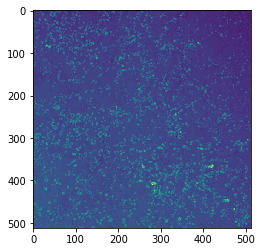

In [84]:
plt.imshow( frame0_R )

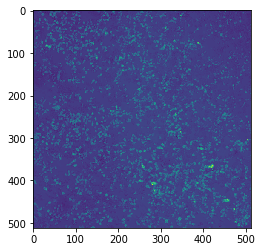

In [85]:
plt.imshow( corr )

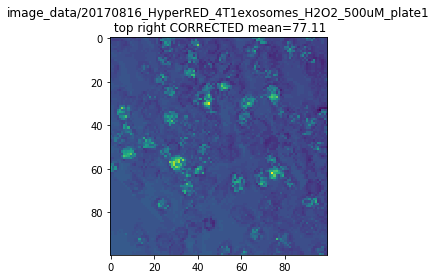

In [86]:
#top right 
top_right = corr[:100,-100:]
plt.imshow( top_right )
plt.title( name + "\n top right CORRECTED mean={:0.2f}".format( top_right.mean() ) )

In [87]:
# bottom left
bot_left = corr[-100:,:100]
plt.imshow( bot_left )
plt.title( name + "\n bottom left CORRECTED mean={:0.2f}".format( bot_left.mean() ) )

### Now do threshold on corrected image

In [88]:
Counter(frame0_R.flatten()).most_common(10)

[(80, 21575),
 (81, 20368),
 (79, 20077),
 (78, 19584),
 (77, 17231),
 (82, 16892),
 (76, 14835),
 (83, 14774),
 (75, 13276),
 (84, 11487)]

In [89]:
Counter( corr.flatten()).most_common(10)

[(78, 40862),
 (79, 37292),
 (80, 30392),
 (77, 30179),
 (76, 19627),
 (81, 17838),
 (75, 11382),
 (82, 7222),
 (74, 5700),
 (83, 5123)]

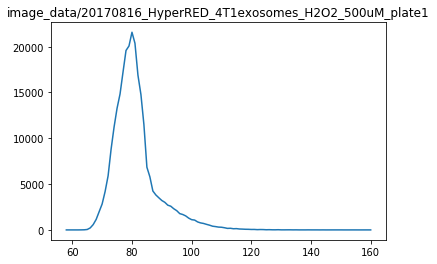

In [90]:
X, Y = zip(*sorted(list( Counter(frame0_R.flatten()).items()) ))

plt.plot( X, Y)
plt.title( name )

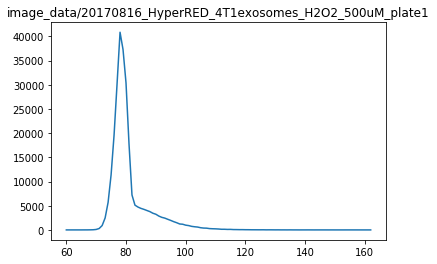

In [91]:
X, Y = zip(*sorted(list( Counter(corr.flatten()).items()) ))

plt.plot( X, Y)
plt.title( name )

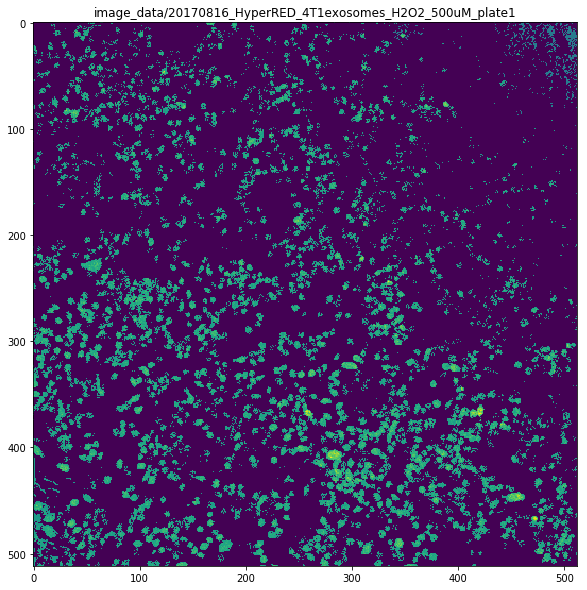

In [92]:
masked = frame0_R.copy()
masked[ (masked >= 68) & (masked <= 86)  ] = 0
fig,ax = plt.subplots( figsize=(10,10))
ax.imshow( masked )
ax.set_title( name )

In [93]:
from collections import Counter
from skimage.color import gray2rgb, rgb2hsv, hsv2rgb, rgb2gray
from skimage.exposure import equalize_adapthist

In [104]:
def ShowThreshold( frame0_R, name, _min, _max ):
    print(name, _min, _max )
    three_chan_gray = equalize_adapthist( gray2rgb( frame0_R ) )
    hsv = rgb2hsv( three_chan_gray )
    mask = (frame0_R >= _min) & (frame0_R <= _max)

    # Turn on color  saturation level
    hsv[:,:,1] = 0.7
    # make the color red (hue = 0)
    hsv[:,:,0][ mask ] = 0
    # make everything else green (hue = 1/3)
    hsv[:,:,0][ ~mask ] = 0.333333
    out = np.hstack( ( three_chan_gray, np.fliplr( hsv2rgb( hsv ) ) ) )
    #out = np.hstack( ( three_chan_gray, hsv2rgb( hsv) ) )
    fig, ax = plt.subplots( figsize=(10,5), dpi=200)
    ax.imshow( out )
    ax.set_title( name )
    fig.savefig( name + "_threshold.pdf" )
    return fig

test 76 81


/usr/local/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


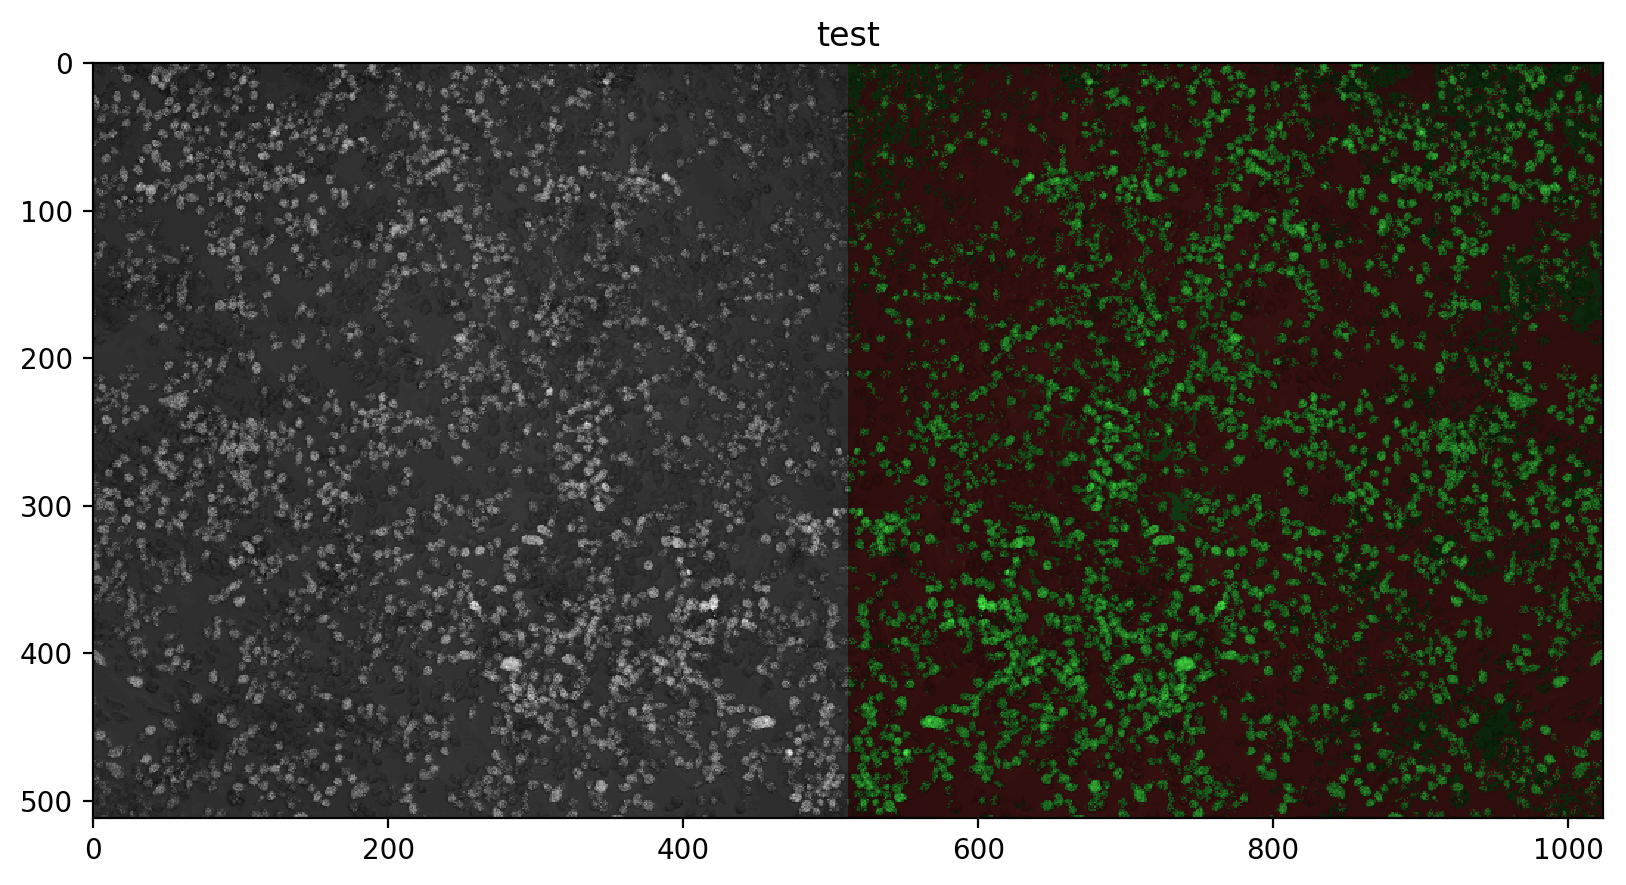

In [105]:
fig = ShowThreshold( corr, "test", 76, 81, )

# next image

## image_data/20170816_HyperRED_H2O2_500uM_plate1

### red channel

In [156]:
name, vid = next( vid_iterator )
name, vid = next( vid_iterator )
name, vid = next( vid_iterator )

In [157]:
print(name)

image_data/20170816_HyperRED_H2O2_500uM_plate1


In [158]:
frame0_R = vid[0][:,:,0].copy()

In [159]:
Counter(frame0_R.flatten()).most_common(10)

[(81, 22628),
 (80, 22502),
 (82, 22253),
 (83, 21994),
 (79, 20154),
 (84, 16985),
 (78, 15660),
 (85, 12410),
 (77, 12254),
 (76, 12155)]

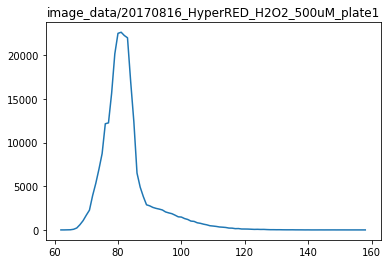

In [160]:
X, Y = zip(*sorted(list( Counter(frame0_R.flatten()).items()) ))
plt.plot( X, Y)
plt.title( name )

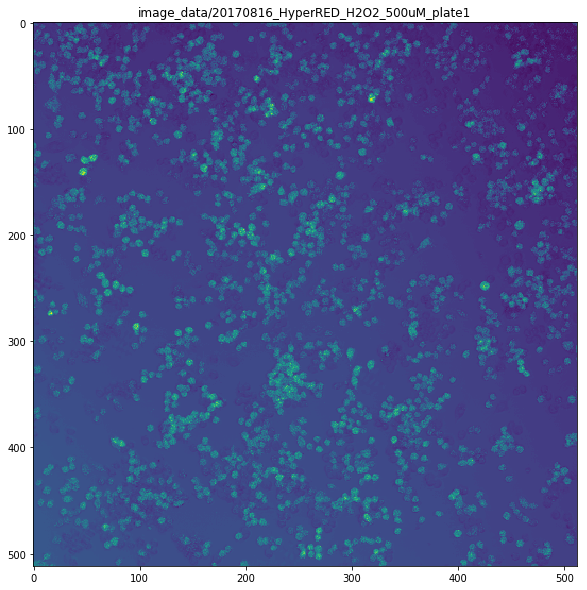

In [161]:
fig,ax = plt.subplots( figsize=(10,10))
ax.imshow( frame0_R )
ax.set_title( name )